## ***IMPORTS***

---



In [ ]:
!pip install mlxtend --upgrade --no-deps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [132]:
from sklearn.datasets import make_classification
from mlxtend.plotting import plot_decision_regions

from sklearn import metrics

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## **PART 1:**
***Randomly create 2500 data-points (x, y)’s of class -1 to lie one side of the function f above and 2500 data-points (x, y)’s of class +1 to lie on the other side of the function.***


---



***GENERATE SYNTHETIC CLASSIFICATION DATASET OF 5000 DATA POINTS***

In [133]:
X, y = make_classification(
               n_samples = 5000,  # generate 5000 data points
              n_features = 2,     # define number of classes, 2
           n_informative = 2,     # define number of informative features/classes, 2
             n_redundant = 0,     # do not create redundant features
    n_clusters_per_class = 2,     # creates 2 clusters per class
               class_sep = 2,     # seperate the classes to limit overlapping
                  flip_y = 0,     # do not mislabel any samples in the dataset
            random_state = 0,     # set random seed to 0
                 shuffle = False) # specify not to shuffle the data points.

***REDEFINE THE TO CLASSES INTO -1 AND +1***

In [134]:
for i, j in enumerate(np.asarray(y)): # for each data point created
    y[y == 0] = -1                    # if the class is 0, change to -1. If not, keep as + 1

***DISPLAY THE NUMBER OF DATA POINTS UNDER CLASS +1 AND -1.***

In [135]:
dataPoints, numDataPoints = np.unique(y, return_counts=True) # get the unique data points and their count

data = {'CLASS': dataPoints, 'DATA POINTS': numDataPoints} # create array of details
df = pd.DataFrame(data) # create dataframe

print(df)

   CLASS  DATA POINTS
0     -1         2500
1      1         2500


***PLOT THE TWO CLASSES***

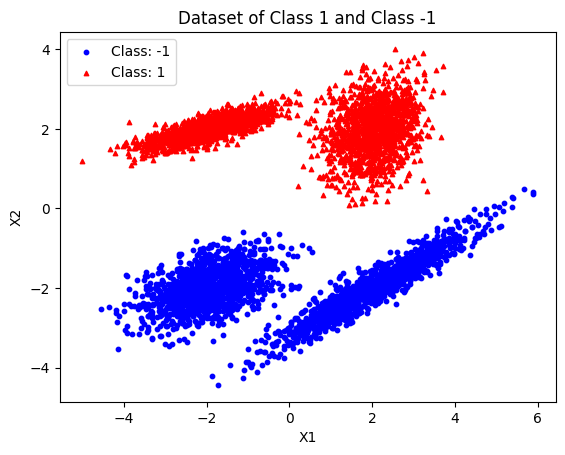

In [151]:
plt.scatter(X[:, 0][y == -1], X[:, 1][y == -1], marker='o', label='Class: -1', c='blue', s = 10)
plt.scatter(X[:, 0][y == 1],  X[:, 1][y == 1],  marker='^', label="Class: 1",  c='red', s = 10)


plt.title("Dataset of Class 1 and Class -1")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()

plt.show()

## **PART 2:**
***Implement the Perceptron learning algorithm and run it on your synthetic data set. Obtain the best Perceptron model via any cross-validation method of your choice.***


---


***SPLIT CLASSES INTO TRAINING AND TESTING DATASETS***

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

***CREATE GRID TO FIND THE BEST PARAMETERS FOR THE PREDICTIVE PERCEPTRON MODEL***

In [138]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron

paramGrid = {
    'alpha': [0.01, 0.1, 0.2, 0.3, 0.4],
    'eta0': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5]
}

# Create the simple Perceptron model
model = Perceptron(random_state = 42, max_iter = 100)

# Perform grid search
gridSearch = GridSearchCV(model, paramGrid, cv=5)
gridSearch.fit(X, y)

# Get the best parameters and best score
bestParams = gridSearch.best_params_
bestScore = gridSearch.best_score_

print("Best Parameters:", bestParams)
print("Best Score:", bestScore)


Best Parameters: {'alpha': 0.01, 'eta0': 0.01}
Best Score: 1.0


***RUN THE PERCEPTRON MODEL ON THE TRAINING DATASET***

In [139]:
model = Perceptron(random_state = 42, 
                          alpha = 0.01, 
                           eta0 = 0.1, 
                       max_iter = 100)
model.fit(X_train, y_train)

Perceptron(alpha=0.01, eta0=0.1, max_iter=100, random_state=42)

***RUN 10-FOLD CROSS VALIDATION ON THE PERCEPTRON MODEL ON THE TRAINING DATASET***

In [140]:
accuracy = (cross_val_score(estimator = model, 
                                    X = X_train, 
                                    y = y_train, 
                                   cv = 10)).mean() * 100
print('MEAN ACCURACY OF PERCEPTRON MODEL: ', accuracy, '%')

MEAN ACCURACY OF PERCEPTRON MODEL:  99.94666666666667 %


***RUN PERCEPTRON MODEL ON THE TEST DATASET, AND CALCULATE PRECISION, RECALL, F1-SCORE, CONFUSION MATRIX***

Precision: 1.0
Recall: 0.998422712933754
F1-score: 0.9992107340173638
Accuracy:  0.9992


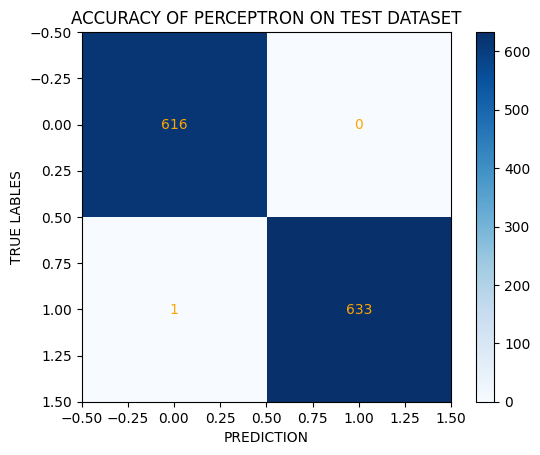

In [141]:
prediction = model.predict(X_test)
# --------------------------------------------------------------
testingAccuracy = metrics.accuracy_score(y_test, prediction)
precision = metrics.precision_score(y_test, prediction)
recall = metrics.recall_score(y_test, prediction)
F1Score = metrics.f1_score(y_test, prediction)
# --------------------------------------------------------------
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", F1Score)
print('Accuracy: ', testingAccuracy)
# --------------------------------------------------------------

confusionMatrix = metrics.confusion_matrix(y_test, prediction)

plt.imshow(confusionMatrix, cmap='Blues')
plt.colorbar()

plt.xlabel('PREDICTION')
plt.ylabel('TRUE LABLES')

plt.title('ACCURACY OF PERCEPTRON ON TEST DATASET')

for i in range(confusionMatrix.shape[0]): # create confusion matrix 
    for j in range(confusionMatrix.shape[1]):
        plt.text(j, i, confusionMatrix[i, j], ha='center', va='center', color='orange')

plt.show()

## **PART 3:**
***Repeat the task above but replace the Perceptron learning algorithm with the Pocket Algorithm.***


---


***SPLIT THE DATA INTO THE TRAINING AND TEST SETS AND SCALE THE FEATURE DATA***

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

***SET UP THE PERCEPTRON ALGORITHM WITH THE POCKET ALGORITHM EXTENSION***

In [143]:
model = Perceptron(random_state=42, alpha=0.01, eta0=0.1, max_iter=100)

pocketWeights = None # set up the pocket weights

misclassCurrent = float('inf') # misclassifications on the training data on the current weight
misclassPocket = float('inf') # misclassifications on the best weight vector

for _ in range(model.max_iter):
    model.fit(X_train, y_train)

    misclassCurrent = (model.predict(X_train) != y_train).sum() # sum of the misclassifications on the training dataset

    # Update the pocket weights if the current solution is better
    if misclassCurrent < misclassPocket: # if current weight vector has less missclassifications than the pocket weight vecotr
        pocketWeights = model.coef_ # set the current weight vector to the pocket weight vector
        misclassPocket = misclassCurrent

model.coef_ = pocketWeights # set current weight vector to the pocket weight vector


***RUN THE PERCEPTRON WITH POCKET WEIGHTS ALGORITHM ON THE TEST DATASET, AND CALCULATE THE ACCURACY, PRECISION, RECALL, F1 SCORE, AND CONFUSION MATRIX***

In [144]:
y_pred = model.predict(X_test) # run model on the test data set

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9992
Precision: 1.0
Recall: 0.998422712933754
F1 Score: 0.9992107340173638


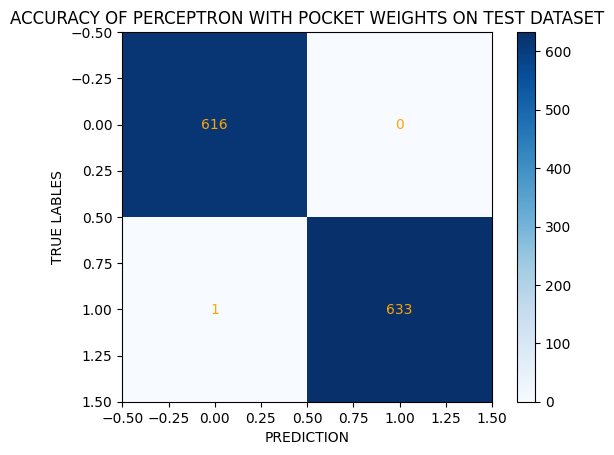

In [150]:
confusionMatrix = metrics.confusion_matrix(y_test, y_pred)

plt.imshow(confusionMatrix, cmap='Blues')
plt.colorbar()

plt.xlabel('PREDICTION')
plt.ylabel('TRUE LABLES')

plt.title('ACCURACY OF PERCEPTRON WITH POCKET WEIGHTS ON TEST DATASET')

for i in range(confusionMatrix.shape[0]): # create confusion matrix 
    for j in range(confusionMatrix.shape[1]):
        plt.text(j, i, confusionMatrix[i, j], ha='center', va='center', color='orange')

plt.show()